In [106]:
#import library
import numpy as np 
import matplotlib.pyplot as plt
import cv2

In [94]:
d={chr(i):i for i in range(255)}  #character to ascii  
c={i:chr(i) for i in range(255)}  #ascii to caharacter

In [95]:
#message and encryption key
key="123"
text="Secret"

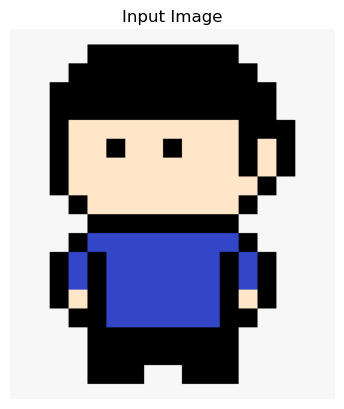

In [108]:
#loading the image
image_path=r"C:\Users\karth\OneDrive\Desktop\CoverImage.png"
x=cv2.imread(image_path)
x_rgb = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
plt.imshow(x_rgb)
plt.title("Input Image")
plt.axis("off")  # Hide axis
plt.show()

Embedding bit (bit) of 'S' at (0, 0, 0) original=247 new=246
Embedding bit (bit) of 'S' at (0, 0, 1) original=247 new=247
Embedding bit (bit) of 'S' at (0, 0, 2) original=247 new=247
Embedding bit (bit) of 'S' at (0, 1, 0) original=247 new=246
Embedding bit (bit) of 'S' at (0, 1, 1) original=247 new=246
Embedding bit (bit) of 'S' at (0, 1, 2) original=247 new=246
Embedding bit (bit) of 'S' at (0, 2, 0) original=247 new=247
Embedding bit (bit) of 'S' at (0, 2, 1) original=247 new=246
Embedding bit (bit) of 'e' at (0, 2, 2) original=247 new=246
Embedding bit (bit) of 'e' at (0, 3, 0) original=247 new=247
Embedding bit (bit) of 'e' at (0, 3, 1) original=247 new=246
Embedding bit (bit) of 'e' at (0, 3, 2) original=247 new=247
Embedding bit (bit) of 'e' at (0, 4, 0) original=247 new=246
Embedding bit (bit) of 'e' at (0, 4, 1) original=247 new=247
Embedding bit (bit) of 'e' at (0, 4, 2) original=247 new=247
Embedding bit (bit) of 'e' at (0, 5, 0) original=247 new=247
Embedding bit (bit) of '

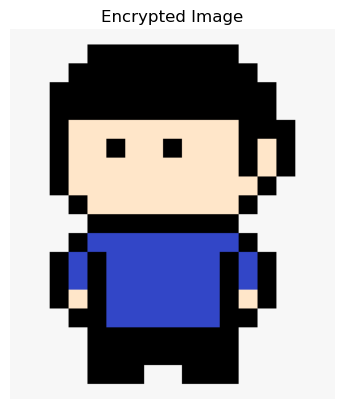

In [110]:
x_enc=x.copy()
n=0  #number of rows
m=0  #number of coloumns
z=0  #colour panel
l=len(text)
kl=0
for i in range(l):
    char_var=d[text[i]]^d[key[kl]]
    for bit_pos in range(8):
        bit=(char_var >> (7-bit_pos))& 1
        org_val =x_enc[n,m,z]
        x_enc[n,m,z]=(org_val & ~1)| bit  
        
        print(f"Embedding bit (bit) of '{text[i]}' at ({n}, {m}, {z}) original={org_val} new={x_enc[n, m, z]}")
        
        z=(z+1)%3
        if z==0: 
            m=m+1
            if m==x_enc.shape[1]:
                m=0
                n=n+1
    kl=(kl+1)%len(key)
    cv2.imwrite("StegnoEncrypted_image.png", x_enc)
encrypted_img = cv2.imread("StegnoEncrypted_image.png")
encrypted_img_rgb = cv2.cvtColor(encrypted_img, cv2.COLOR_BGR2RGB)
plt.imshow(encrypted_img_rgb)
plt.title("Encrypted Image")
plt.axis("off")
plt.show()    
    

In [102]:
#decryption
n,m,z=0,0,0
kl=0
l=len(text)
decrypt=""
for i in range(l):
    val=0
    for bit_pos in range(8):
        bit= x_enc[n,m,z]& 1
        val=(val << 1) | bit
        print(f"Reading bit {bit} from ({n},{m},{z})")
        z=(z+1)%3
        if z==0: 
            m=m+1
            if m==x_enc.shape[1]:
                m=0
                n=n+1
    orig_char= c[val ^ d[key[kl]]]
    decrypt+=orig_char
    print(f"Decrypted byte: {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{orig_char}'")
    kl=(kl+1)%len(key)
print("Decrypt text", decrypt)


Reading bit 0 from (0,0,0)
Reading bit 1 from (0,0,1)
Reading bit 1 from (0,0,2)
Reading bit 0 from (0,1,0)
Reading bit 0 from (0,1,1)
Reading bit 0 from (0,1,2)
Reading bit 1 from (0,2,0)
Reading bit 0 from (0,2,1)
Decrypted byte: 98 XOR 49 = 83 -> 'S'
Reading bit 0 from (0,2,2)
Reading bit 1 from (0,3,0)
Reading bit 0 from (0,3,1)
Reading bit 1 from (0,3,2)
Reading bit 0 from (0,4,0)
Reading bit 1 from (0,4,1)
Reading bit 1 from (0,4,2)
Reading bit 1 from (0,5,0)
Decrypted byte: 87 XOR 50 = 101 -> 'e'
Reading bit 0 from (0,5,1)
Reading bit 1 from (0,5,2)
Reading bit 0 from (0,6,0)
Reading bit 1 from (0,6,1)
Reading bit 0 from (0,6,2)
Reading bit 0 from (0,7,0)
Reading bit 0 from (0,7,1)
Reading bit 0 from (0,7,2)
Decrypted byte: 80 XOR 51 = 99 -> 'c'
Reading bit 0 from (0,8,0)
Reading bit 1 from (0,8,1)
Reading bit 0 from (0,8,2)
Reading bit 0 from (0,9,0)
Reading bit 0 from (0,9,1)
Reading bit 0 from (0,9,2)
Reading bit 1 from (0,10,0)
Reading bit 1 from (0,10,1)
Decrypted byte: 67 